# Comparing SMARP and SHARP coordinates

The MDI line-of-sight magnetic field data include some optical distortion with a temporal and spatial variance that is, as of now, not fully understood. As a result, a coordinate in the SHARP data may not map to the same physical feature in the SMARP data. This effect is exaggerated near the limb and almost zero at disk-center. This notebook shows what this discrepancy looks like for one active region.

In [1]:
import matplotlib.pylab as plt
import sunpy.map
from sunpy.visualization.colormaps import color_tables as ct
import astropy.units as u
import drms
import numpy as np
import matplotlib.gridspec as gridspec
import matplotlib.colors as colors
from datetime import datetime as dt_obj
from astropy.coordinates import SkyCoord
from sunpy.coordinates import frames
from IPython.display import Video
%config InlineBackend.figure_format='retina'

#### Set up the data query

The first step in querying for SMARP and SHARP data is to establish a connection to JSOC. This can be done with the `Client()` class. To do this, first [register your e-mail address with JSOC](http://jsoc.stanford.edu/ajax/register_email.html).

In [2]:
email='your@email.address' # Put in a registered e-mail address
c = drms.Client(debug=True, verbose=True, email=email)

http://jsoc.stanford.edu/cgi-bin/ajax/checkAddress.sh?address=mbobra%2540stanford.edu&checkonly=1


Let's look at all of the records in NOAA Active Region 11112, which has TARP number, or `TARPNUM`, 13643 and HARP Number, or `HARPNUM` 211. We filter the records by the `QUALITY` keyword. The HMI QUALITY bits are defined [here](http://jsoc.stanford.edu/doc/data/hmi/Quality_Bits/QUALITY.txt) and the MDI QUALITY bits are defined [here](http://soi.stanford.edu/production/QUALITY/bits.fd_M.html). See the the [MDI Observables website](http://soi.stanford.edu/mdi/observables/) for more information about the MDI data.

In [3]:
harpnum = '86'
tarpnum = '13520'

In [4]:
sharp_query_string = 'hmi.sharp_cea_720s['+harpnum+'][][? (QUALITY<65536) ?]'
smarp_query_string = 'mdi.smarp_cea_96m['+tarpnum+'][][? (QUALITY<262144) ?]'

In [5]:
sharpkeys = c.query(sharp_query_string, key=drms.const.all)
smarpkeys = c.query(smarp_query_string, key=drms.const.all)

http://jsoc.stanford.edu/cgi-bin/ajax/jsoc_info?op=rs_list&ds=hmi.sharp_cea_720s%5B86%5D%5B%5D%5B%3F+%28QUALITY%3C65536%29+%3F%5D&key=%2A%2AALL%2A%2A
http://jsoc.stanford.edu/cgi-bin/ajax/jsoc_info?op=series_struct&ds=hmi.sharp_cea_720s
http://jsoc.stanford.edu/cgi-bin/ajax/jsoc_info?op=rs_list&ds=mdi.smarp_cea_96m%5B13520%5D%5B%5D%5B%3F+%28QUALITY%3C262144%29+%3F%5D&key=%2A%2AALL%2A%2A
http://jsoc.stanford.edu/cgi-bin/ajax/jsoc_info?op=series_struct&ds=mdi.smarp_cea_96m


Now let's plot the Stonyhurst longitude of this active region, as observed in both the SMARP and SHARP data, over the course of its lifetime. 

In [6]:
def parse_tai_string(tstr,datetime=True):
    year   = int(tstr[:4])
    month  = int(tstr[5:7])
    day    = int(tstr[8:10])
    hour   = int(tstr[11:13])
    minute = int(tstr[14:16])
    if datetime: return dt_obj(year,month,day,hour,minute)
    else: return year,month,day,hour,minute

In [7]:
t_rec_sharp = np.array([parse_tai_string(sharpkeys.T_REC[i],datetime=True) for i in range(sharpkeys.T_REC.size)])
t_rec_smarp = np.array([parse_tai_string(smarpkeys.T_REC[i],datetime=True) for i in range(smarpkeys.T_REC.size)])

In [8]:
stonyhurst_latitude_sharp = sharpkeys.CRVAL1 - sharpkeys.CRLN_OBS
stonyhurst_latitude_smarp = smarpkeys.CRVAL1 - smarpkeys.CRLN_OBS

Text(0.5, 1.0, 'NOAA Active Region 11087')

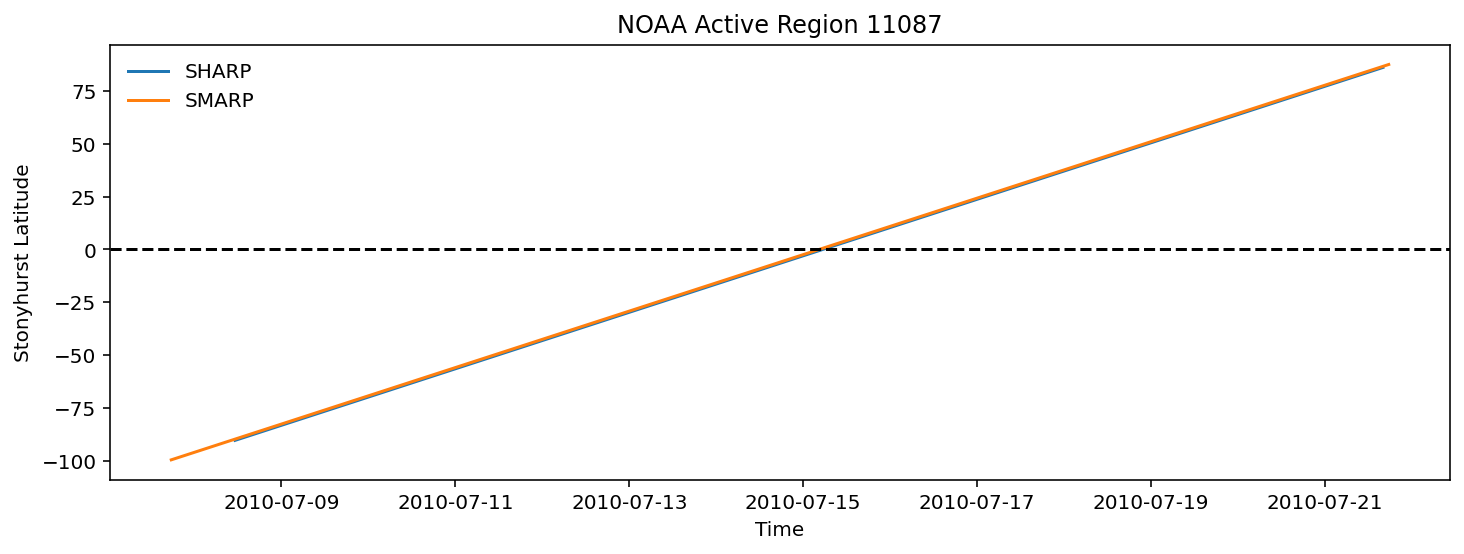

In [9]:
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(t_rec_sharp, stonyhurst_latitude_sharp, label='SHARP')
ax.plot(t_rec_smarp, stonyhurst_latitude_smarp, label='SMARP')
ax.axhline(0, linestyle='--', color='k')
ax.legend(frameon=False)
ax.set_xlabel("Time")
ax.set_ylabel("Stonyhurst Latitude")
ax.set_title("NOAA Active Region "+sharpkeys.NOAA_ARS[0])

This is an image from around the time the active region passes through the central meridian:

In [10]:
t_rec = '2010.07.15_00:00:00'

In [11]:
sharp_query = 'hmi.sharp_cea_720s['+harpnum+']['+t_rec+'][? (QUALITY<65536) ?]'
sharp_key = c.query(sharp_query, key=drms.const.all)
r = c.export(sharp_query+'{magnetogram}', protocol='fits', email=email)
fits_url_sharp = r.urls['url'][0]
sharp_map = sunpy.map.Map(fits_url_sharp)

http://jsoc.stanford.edu/cgi-bin/ajax/jsoc_info?op=rs_list&ds=hmi.sharp_cea_720s%5B86%5D%5B2010.07.15_00%3A00%3A00%5D%5B%3F+%28QUALITY%3C65536%29+%3F%5D&key=%2A%2AALL%2A%2A
http://jsoc.stanford.edu/cgi-bin/ajax/jsoc_fetch?op=exp_request&format=json&ds=hmi.sharp_cea_720s%5B86%5D%5B2010.07.15_00%3A00%3A00%5D%5B%3F+%28QUALITY%3C65536%29+%3F%5D%7Bmagnetogram%7D&notify=mbobra%40stanford.edu&method=url&protocol=fits&filenamefmt=hmi.sharp_cea_720s.%7BHARPNUM%7D.%7BT_REC%3AA%7D.%7Bsegment%7D&process%3Dn=0&requestor=mbobra
Export request pending. [id=JSOC_20210526_1015, status=2]
Waiting for 5 seconds...
http://jsoc.stanford.edu/cgi-bin/ajax/jsoc_fetch?op=exp_status&requestid=JSOC_20210526_1015


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

In [12]:
smarp_query = 'mdi.smarp_cea_96m['+tarpnum+']['+t_rec+'][? (QUALITY<262144) ?]'
smarp_key = c.query(smarp_query, key=drms.const.all)
r = c.export(smarp_query+'{magnetogram}', protocol='fits', email=email)
fits_url_smarp = r.urls['url'][0]
smarp_map = sunpy.map.Map(fits_url_smarp)

http://jsoc.stanford.edu/cgi-bin/ajax/jsoc_info?op=rs_list&ds=mdi.smarp_cea_96m%5B13520%5D%5B2010.07.15_00%3A00%3A00%5D%5B%3F+%28QUALITY%3C262144%29+%3F%5D&key=%2A%2AALL%2A%2A
http://jsoc.stanford.edu/cgi-bin/ajax/jsoc_fetch?op=exp_request&format=json&ds=mdi.smarp_cea_96m%5B13520%5D%5B2010.07.15_00%3A00%3A00%5D%5B%3F+%28QUALITY%3C262144%29+%3F%5D%7Bmagnetogram%7D&notify=mbobra%40stanford.edu&method=url&protocol=fits&filenamefmt=mdi.smarp_cea_96m.%7BTARPNUM%7D.%7BT_REC%3AA%7D.%7Bsegment%7D&process%3Dn=0&requestor=mbobra
Export request pending. [id=JSOC_20210526_1016_X_IN, status=2]
Waiting for 5 seconds...
http://jsoc.stanford.edu/cgi-bin/ajax/jsoc_fetch?op=exp_status&requestid=JSOC_20210526_1016_X_IN


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

mdi.smarp_cea_96m.13520.20100715_000000_TAI.magnetogram.fits:   0%|          | 0.00/80.6k [00:00<?, ?B/s]

In [13]:
print('The Stonyhurst latitude for this map is',(smarp_key.CRVAL1[0] - smarp_key.CRLN_OBS[0]))

The Stonyhurst latitude for this map is -2.475999999999999


This is a plot of two arbitrary coordinates, indicated with a red and yellow x, on the SHARP map. The goal is to plot these same two arbirary coordinates on the SMARP map and determine whether they map to the same physical feature.

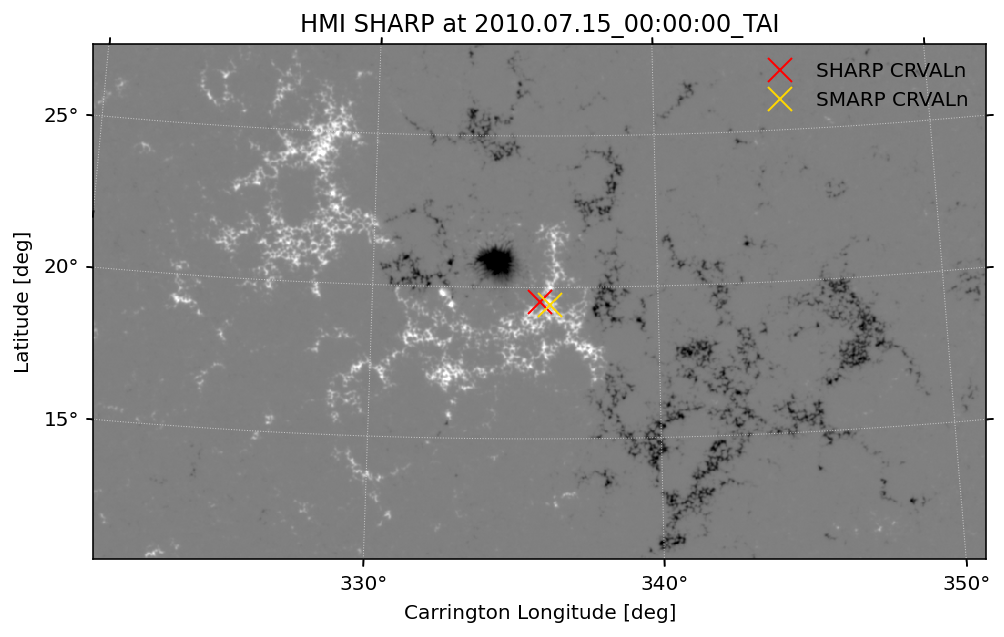

In [14]:
# Create a new matplotlib figure, larger than default.
fig = plt.figure(figsize=(8,14))

# Add a first Axis, using the WCS from the map.
ax = fig.add_subplot(2,1,1, projection=sharp_map)

# Plot the Map on the axes with default settings.
sharp_map.plot(norm=colors.Normalize(vmin=-800, vmax=800))

# Define the spatial center of HMI patch in latitude and longitude and plot with a red x
xch = sharp_key['CRVAL1'][0]*u.deg
ych = sharp_key['CRVAL2'][0]*u.deg
coordsh = SkyCoord(xch, ych, frame=sharp_map.coordinate_frame)
p = ax.plot_coord(coordsh, 'x', color='red', label='SHARP CRVALn', markersize=12)

# Define the spatial center of MDI patch in latitude and longitude and plot with a yellow x
xcm = smarp_key['CRVAL1'][0]*u.deg
ycm = smarp_key['CRVAL2'][0]*u.deg
coordsm = SkyCoord(xcm, ycm, frame=sharp_map.coordinate_frame)
p = ax.plot_coord(coordsm, 'x', color='gold', label='SMARP CRVALn', markersize=12)

# Plot elements
ax.set_title('HMI SHARP at '+str(sharp_key['T_REC'][0]))
legend = plt.legend(loc='upper right', framealpha=0.0,title='')

Now plot these same two arbirary coordinates on the SMARP map and determine whether they map to the same physical feature.

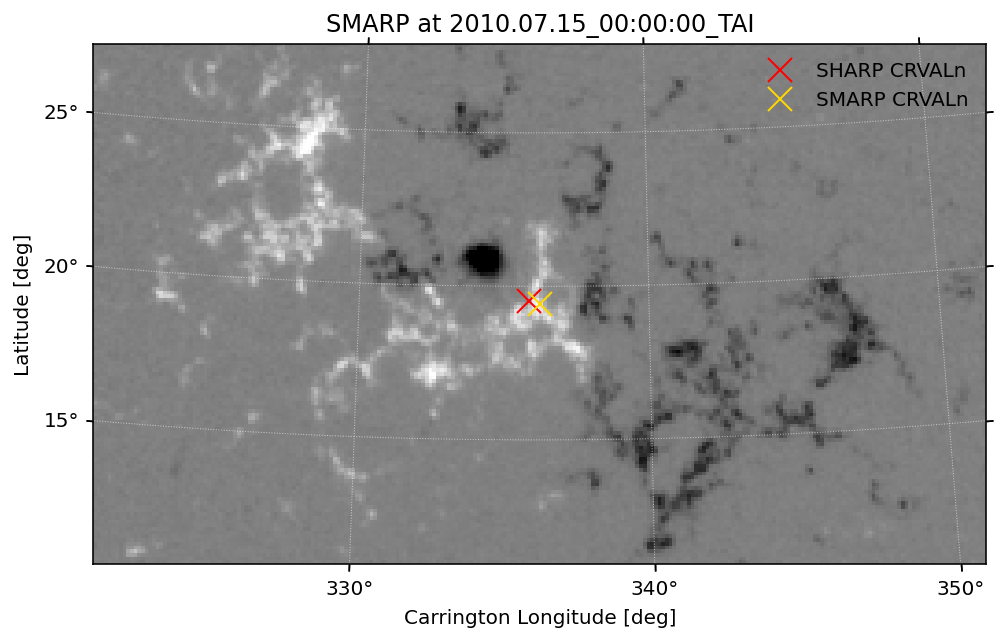

In [15]:
# Create a new matplotlib figure, larger than default.
fig = plt.figure(figsize=(8,14))

# Add a first Axis, using the WCS from the map.
ax = fig.add_subplot(2,1,1, projection=smarp_map)

# Plot the Map on the axes with default settings.
smarp_map.plot(norm=colors.Normalize(vmin=-800, vmax=800))

# Define the spatial center of HMI patch in latitude and longitude and plot with a red x
xch = sharp_key['CRVAL1'][0]*u.deg
ych = sharp_key['CRVAL2'][0]*u.deg
coordsh = SkyCoord(xch, ych, frame=smarp_map.coordinate_frame)
p = ax.plot_coord(coordsh, 'x', color='red', label='SHARP CRVALn', markersize=12)

# Define the spatial center of MDI patch in latitude and longitude and plot with a yellow x
xcm = smarp_key['CRVAL1'][0]*u.deg
ycm = smarp_key['CRVAL2'][0]*u.deg
coordsm = SkyCoord(xcm, ycm, frame=smarp_map.coordinate_frame)
p = ax.plot_coord(coordsm, 'x', color='gold', label='SMARP CRVALn', markersize=12)

# Plot elements
ax.set_title('SMARP at '+str(smarp_key['T_REC'][0]))
legend = plt.legend(loc='upper right', framealpha=0.0,title='')

The red x and yellow x seem to map to nearly the same place on the SHARP and SMARP data, but not exactly. We can zoom in to see the difference using [SunPy submap](https://docs.sunpy.org/en/stable/generated/gallery/map/submaps_and_cropping.html). 

In [16]:
# Create the SHARP submap
coord_bottom_left = SkyCoord(334*u.deg, 18*u.deg, frame=sharp_map.coordinate_frame)
coord_top_right = SkyCoord(338*u.deg, 21*u.deg, frame=sharp_map.coordinate_frame)
sub_sharp = sharp_map.submap(coord_bottom_left, top_right=coord_top_right)

In [17]:
# Create the SMARP submap
coord_bottom_left = SkyCoord(334*u.deg, 18*u.deg, frame=smarp_map.coordinate_frame)
coord_top_right = SkyCoord(338*u.deg, 21*u.deg, frame=smarp_map.coordinate_frame)
sub_smarp = smarp_map.submap(coord_bottom_left, top_right=coord_top_right)

<Figure size 720x1008 with 0 Axes>

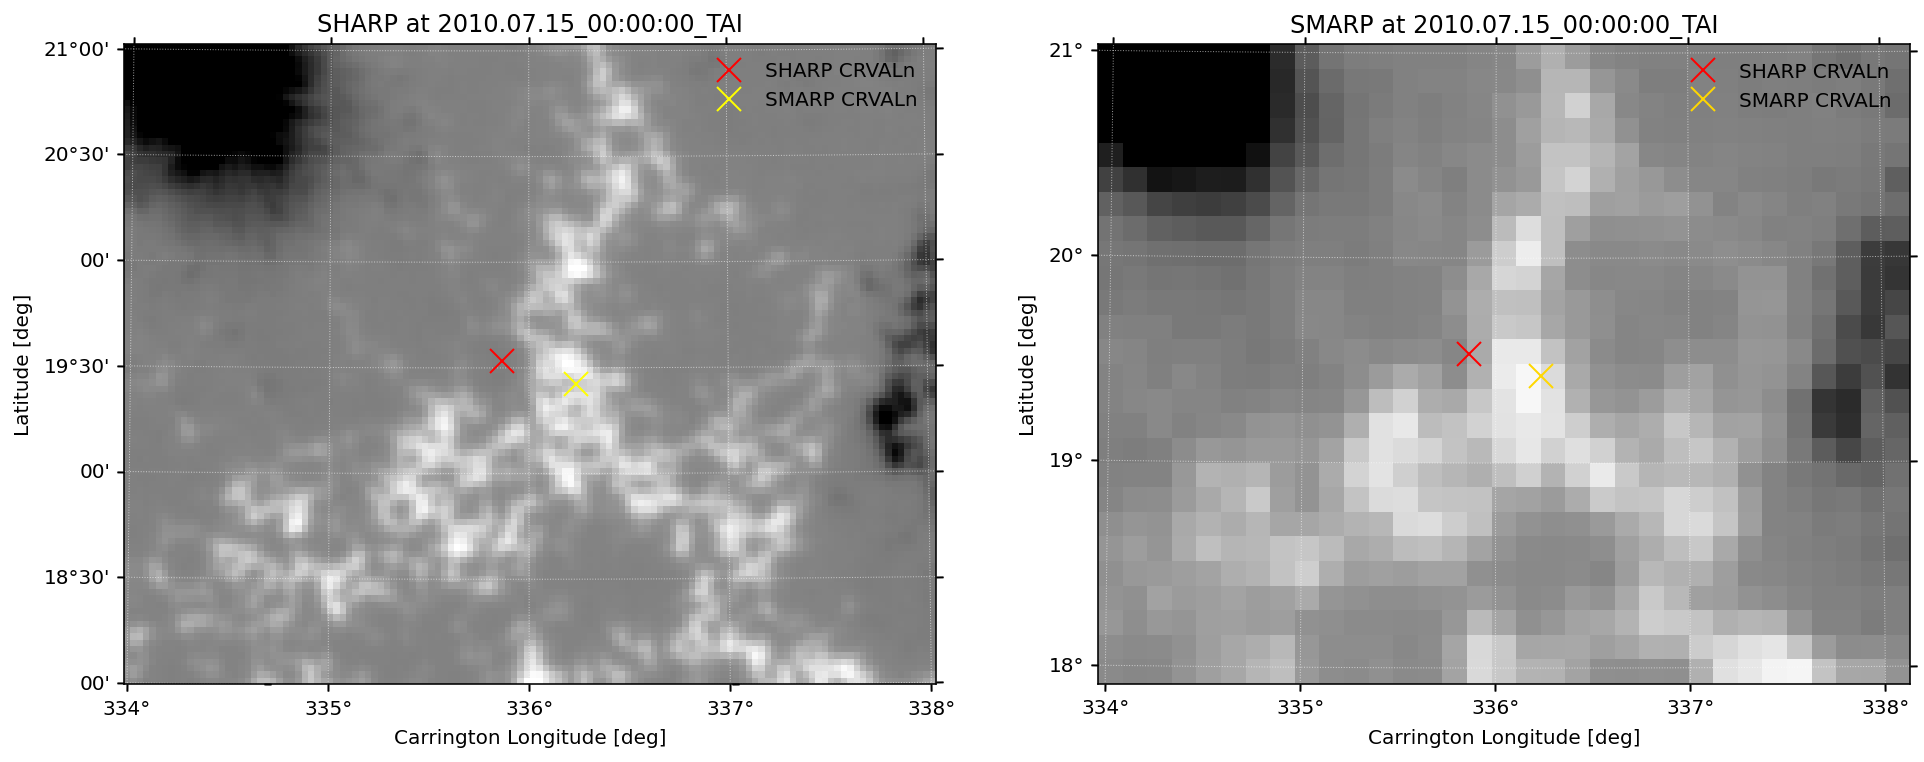

In [18]:
# Create a new matplotlib figure, larger than default.
fig = plt.figure(figsize=(10,14))

fig = plt.figure(figsize=(16, 8))
gs = gridspec.GridSpec(nrows=1, ncols=2)

### SHARP submap
# Add a first Axis, using the WCS from the map.
ax0 = fig.add_subplot(gs[0, 0], projection=sub_sharp)

# Plot the Map on the axes with default settings.
sub_sharp.plot(norm=colors.Normalize(vmin=-800, vmax=800))

# Define the spatial center of HMI patch in latitude and longitude and plot with a red x
xch = sharp_key['CRVAL1'][0]*u.deg
ych = sharp_key['CRVAL2'][0]*u.deg
coordsh = SkyCoord(xch, ych, frame=sharp_map.coordinate_frame)
p = ax0.plot_coord(coordsh, 'x', color='red', label='SHARP CRVALn', markersize=12)

# Define the spatial center of MDI patch in latitude and longitude and plot with a yellow x
xcm = smarp_key['CRVAL1'][0]*u.deg
ycm = smarp_key['CRVAL2'][0]*u.deg
coordsm = SkyCoord(xcm, ycm, frame=sharp_map.coordinate_frame)
p = ax0.plot_coord(coordsm, 'x', color='yellow', label='SMARP CRVALn', markersize=12)

# Plot elements
ax0.set_title('SHARP at '+str(sharp_key['T_REC'][0]))
legend = plt.legend(loc='upper right', framealpha=0.0,title='')

### SMARP submap
# Add a first Axis, using the WCS from the map.
ax0 = fig.add_subplot(gs[0, 1], projection=sub_smarp)

# Plot the Map on the axes with default settings.
sub_smarp.plot(norm=colors.Normalize(vmin=-800, vmax=800))

# Define the spatial center of HMI patch in latitude and longitude and plot with a red x
xch = sharp_key['CRVAL1'][0]*u.deg
ych = sharp_key['CRVAL2'][0]*u.deg
coordsh = SkyCoord(xch, ych, frame=smarp_map.coordinate_frame)
p = ax0.plot_coord(coordsh, 'x', color='red', label='SHARP CRVALn', markersize=12)

# Define the spatial center of MDI patch in latitude and longitude and plot with a yellow x
xcm = smarp_key['CRVAL1'][0]*u.deg
ycm = smarp_key['CRVAL2'][0]*u.deg
coordsm = SkyCoord(xcm, ycm, frame=smarp_map.coordinate_frame)
p = ax0.plot_coord(coordsm, 'x', color='gold', label='SMARP CRVALn', markersize=12)

# Plot elements
ax0.set_title('SMARP at '+str(sharp_key['T_REC'][0]))
legend = plt.legend(loc='upper right', framealpha=0.0,title='')

Both the red and yellow x's seem to be the same place with respect to the physical features on the map. But this is not the case when the active region is near the limb. Here is the same exercise for data taken four days later, when the active region is closer to the limb.

In [19]:
t_rec = '2010.07.19_00:00:00'

In [20]:
sharp_query = 'hmi.sharp_cea_720s['+harpnum+']['+t_rec+'][? (QUALITY<65536) ?]'
sharp_key = c.query(sharp_query, key=drms.const.all)
r = c.export(sharp_query+'{magnetogram}', protocol='fits', email=email)
fits_url_sharp = r.urls['url'][0]
sharp_map = sunpy.map.Map(fits_url_sharp)

http://jsoc.stanford.edu/cgi-bin/ajax/jsoc_info?op=rs_list&ds=hmi.sharp_cea_720s%5B86%5D%5B2010.07.19_00%3A00%3A00%5D%5B%3F+%28QUALITY%3C65536%29+%3F%5D&key=%2A%2AALL%2A%2A
http://jsoc.stanford.edu/cgi-bin/ajax/jsoc_fetch?op=exp_request&format=json&ds=hmi.sharp_cea_720s%5B86%5D%5B2010.07.19_00%3A00%3A00%5D%5B%3F+%28QUALITY%3C65536%29+%3F%5D%7Bmagnetogram%7D&notify=mbobra%40stanford.edu&method=url&protocol=fits&filenamefmt=hmi.sharp_cea_720s.%7BHARPNUM%7D.%7BT_REC%3AA%7D.%7Bsegment%7D&process%3Dn=0&requestor=mbobra
Export request pending. [id=JSOC_20210526_1017, status=2]
Waiting for 5 seconds...
http://jsoc.stanford.edu/cgi-bin/ajax/jsoc_fetch?op=exp_status&requestid=JSOC_20210526_1017
Export request pending. [id=JSOC_20210526_1017, status=1]
Waiting for 5 seconds...
http://jsoc.stanford.edu/cgi-bin/ajax/jsoc_fetch?op=exp_status&requestid=JSOC_20210526_1017


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

In [21]:
smarp_query = 'mdi.smarp_cea_96m['+tarpnum+']['+t_rec+'][? (QUALITY<262144) ?]'
smarp_key = c.query(smarp_query, key=drms.const.all)
r = c.export(smarp_query+'{magnetogram}', protocol='fits', email=email)
fits_url_smarp = r.urls['url'][0]
smarp_map = sunpy.map.Map(fits_url_smarp)

http://jsoc.stanford.edu/cgi-bin/ajax/jsoc_info?op=rs_list&ds=mdi.smarp_cea_96m%5B13520%5D%5B2010.07.19_00%3A00%3A00%5D%5B%3F+%28QUALITY%3C262144%29+%3F%5D&key=%2A%2AALL%2A%2A
http://jsoc.stanford.edu/cgi-bin/ajax/jsoc_fetch?op=exp_request&format=json&ds=mdi.smarp_cea_96m%5B13520%5D%5B2010.07.19_00%3A00%3A00%5D%5B%3F+%28QUALITY%3C262144%29+%3F%5D%7Bmagnetogram%7D&notify=mbobra%40stanford.edu&method=url&protocol=fits&filenamefmt=mdi.smarp_cea_96m.%7BTARPNUM%7D.%7BT_REC%3AA%7D.%7Bsegment%7D&process%3Dn=0&requestor=mbobra
Export request pending. [id=JSOC_20210526_1018_X_IN, status=2]
Waiting for 5 seconds...
http://jsoc.stanford.edu/cgi-bin/ajax/jsoc_fetch?op=exp_status&requestid=JSOC_20210526_1018_X_IN


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

mdi.smarp_cea_96m.13520.20100719_000000_TAI.magnetogram.fits:   0%|          | 0.00/74.9k [00:00<?, ?B/s]

In [22]:
print('The Stonyhurst latitude for this map is',(smarp_key.CRVAL1[0] - smarp_key.CRLN_OBS[0]))

The Stonyhurst latitude for this map is 50.974000000000046


In [23]:
# Create the SHARP submap
coord_bottom_left = SkyCoord(334*u.deg, 18*u.deg, frame=sharp_map.coordinate_frame)
coord_top_right = SkyCoord(338*u.deg, 21*u.deg, frame=sharp_map.coordinate_frame)
sub_sharp = sharp_map.submap(coord_bottom_left, top_right=coord_top_right)

In [24]:
# Create the SMARP submap
coord_bottom_left = SkyCoord(334*u.deg, 18*u.deg, frame=smarp_map.coordinate_frame)
coord_top_right = SkyCoord(338*u.deg, 21*u.deg, frame=smarp_map.coordinate_frame)
sub_smarp = smarp_map.submap(coord_bottom_left, top_right=coord_top_right)

<Figure size 720x1008 with 0 Axes>

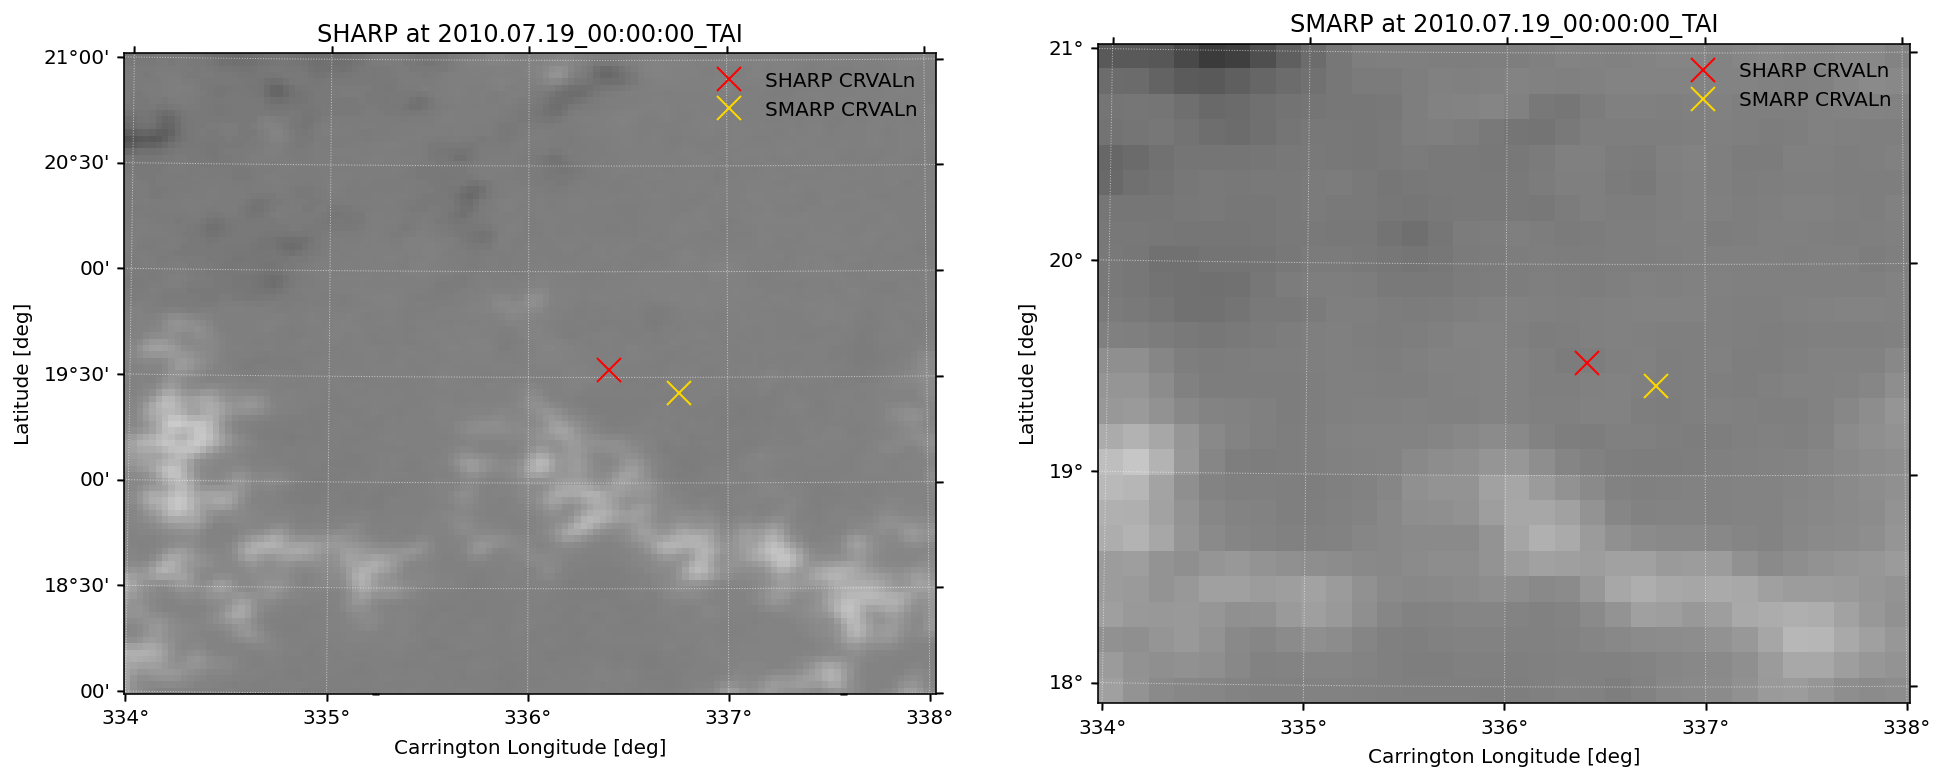

In [25]:
# Create a new matplotlib figure, larger than default.
fig = plt.figure(figsize=(10,14))

fig = plt.figure(figsize=(16, 8))
gs = gridspec.GridSpec(nrows=1, ncols=2)

### SHARP submap
# Add a first Axis, using the WCS from the map.
ax0 = fig.add_subplot(gs[0, 0], projection=sub_sharp)

# Plot the Map on the axes with default settings.
sub_sharp.plot(norm=colors.Normalize(vmin=-800, vmax=800))

# Define the spatial center of HMI patch in latitude and longitude and plot with a red x
xch = sharp_key['CRVAL1'][0]*u.deg
ych = sharp_key['CRVAL2'][0]*u.deg
coordsh = SkyCoord(xch, ych, frame=sharp_map.coordinate_frame)
p = ax0.plot_coord(coordsh, 'x', color='red', label='SHARP CRVALn', markersize=12)

# Define the spatial center of MDI patch in latitude and longitude and plot with a yellow x
xcm = smarp_key['CRVAL1'][0]*u.deg
ycm = smarp_key['CRVAL2'][0]*u.deg
coordsm = SkyCoord(xcm, ycm, frame=sharp_map.coordinate_frame)
p = ax0.plot_coord(coordsm, 'x', color='gold', label='SMARP CRVALn', markersize=12)

# Plot elements
ax0.set_title('SHARP at '+str(sharp_key['T_REC'][0]))
legend = plt.legend(loc='upper right', framealpha=0.0,title='')

### SMARP submap
# Add a first Axis, using the WCS from the map.
ax0 = fig.add_subplot(gs[0, 1], projection=sub_smarp)

# Plot the Map on the axes with default settings.
sub_smarp.plot(norm=colors.Normalize(vmin=-800, vmax=800))

# Define the spatial center of HMI patch in latitude and longitude and plot with a red x
xch = sharp_key['CRVAL1'][0]*u.deg
ych = sharp_key['CRVAL2'][0]*u.deg
coordsh = SkyCoord(xch, ych, frame=smarp_map.coordinate_frame)
p = ax0.plot_coord(coordsh, 'x', color='red', label='SHARP CRVALn', markersize=12)

# Define the spatial center of MDI patch in latitude and longitude and plot with a yellow x
xcm = smarp_key['CRVAL1'][0]*u.deg
ycm = smarp_key['CRVAL2'][0]*u.deg
coordsm = SkyCoord(xcm, ycm, frame=smarp_map.coordinate_frame)
p = ax0.plot_coord(coordsm, 'x', color='gold', label='SMARP CRVALn', markersize=12)

# Plot elements
ax0.set_title('SMARP at '+str(sharp_key['T_REC'][0]))
legend = plt.legend(loc='upper right', framealpha=0.0,title='')

In the SHARP map, the red x is above, and fairly close to, a positive-field region. In the SMARP map, the red x is above, but slightly further away, from the same feature. This is because MDI line-of-sight magnetic field data include some optical distortion with a temporal and spatial variance that is, as of now, not fully understood. Users should be aware of using the SMARP data for high-precision (within a few MDI pixels) alignment with the SHARP data or other data sets.